<a href="https://colab.research.google.com/github/duraichellam001-tech/ev-range-model/blob/main/notebooks/04_baseline_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ev-range-model/data/training_dataset.csv')
print(dataset.shape)
dataset.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(15, 13)


,speed_factor,avg_speed,max_speed,std_speed,percent_idle,avg_accel,avg_decel,accel_std,peak_accel,cycle_duration,total_distance_km,energy_Wh,wh_per_km
0,0.6,18.753492,54.432,14.119993,0.204661,0.300980,0.344702,0.372577,0.880000,1373,7.152373,731.422162,102.262861
1,0.8,25.004655,72.576,18.826658,0.197378,0.401307,0.459602,0.496770,1.173333,1373,9.536498,1187.205757,124.490750
2,1.0,31.255819,90.720,23.533322,0.196650,0.501634,0.574503,0.620962,1.466667,1373,11.920622,1772.295684,148.674763
3,1.2,37.506983,108.864,28.239987,0.195921,0.601961,0.689404,0.745155,1.760000,1373,14.304747,2497.618506,174.600681
4,1.5,46.883729,136.080,35.299984,0.193736,0.752451,0.861754,0.931443,2.200000,1373,17.880933,3876.045783,216.769769


In [3]:
X = dataset.drop(columns=['wh_per_km', 'energy_Wh'])
y = dataset['wh_per_km']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    'Linear': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, n_estimators=200)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name:12s} → MAE: {mae:.2f}, R²: {r2:.3f}")


Linear       → MAE: 8.18, R²: 0.984
RandomForest → MAE: 23.96, R²: 0.817
XGBoost      → MAE: 33.02, R²: 0.592


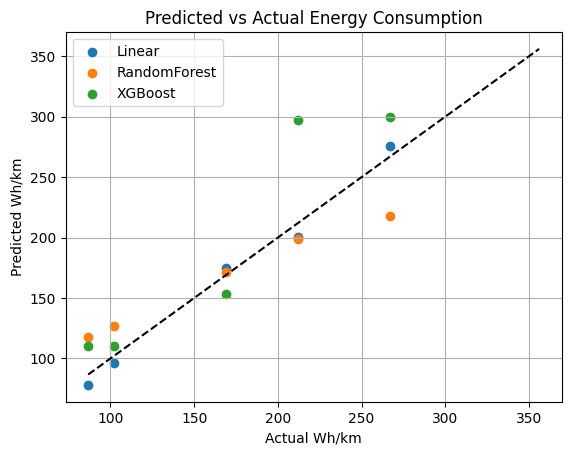

In [7]:
import matplotlib.pyplot as plt

for name, model in models.items():
    preds = model.predict(X_test)
    plt.scatter(y_test, preds, label=name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # 45° line
plt.xlabel('Actual Wh/km')
plt.ylabel('Predicted Wh/km')
plt.legend()
plt.title('Predicted vs Actual Energy Consumption')
plt.grid(True)
plt.show()
